In [1]:
#importing packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/project files/finalfile.csv")
dataset

,DE,FE,fault
0,-0.402027,-0.058965,1
1,0.548219,0.221480,1
2,0.931565,0.044173,1
3,-0.218881,-0.017669,1
4,-1.079788,0.187580,1
...,...,...,...
121152,-0.042349,0.098824,0
121153,-0.013560,0.042940,0
121154,0.057369,0.024655,0
121155,0.095129,0.000205,0


In [4]:
x=dataset.drop(columns=["fault"])
y=dataset["fault"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
classifier = Sequential()

In [9]:
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=2))

In [10]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

In [11]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [12]:
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'], learning_rate=0.01)
classifier.compile(
    # loss = keras.losses.SparseCategoricalCrossentropy(from_logits=false)
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.005),
    metrics = ["accuracy"]
    )
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [18]:
model = classifier.fit(X_train, y_train, batch_size = 100000, epochs = 100, shuffle = True)


Epoch 1/100
1/1 [==============================] - 0s 139ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 2/100
1/1 [==============================] - 0s 114ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 3/100
1/1 [==============================] - 0s 133ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 4/100
1/1 [==============================] - 0s 88ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 6/100
1/1 [==============================] - 0s 80ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 7/100
1/1 [==============================] - 0s 93ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 8/100
1/1 [==============================] - 0s 101ms/step - loss: 0.3427 - accuracy: 0.8500
Epoch 9/100
1/1 [==============================] - 0s 91ms/step - loss: 0.3426 - accuracy: 0.8499
Epoch 10/100
1/1 [==============================] - 0s 98ms/step - loss: 0.3426 - accuracy: 0.8499
Epoch 11/100
1/

In [19]:
# y_pred = classifier.predict(X_test)
# print(X_test)
# y_pred = (y_pred > 0.5)
# print(y_pred)
import numpy as np
a=float(input("DE"))
b=float(input("FE"))
y_new = np.array([[a, b]])
new_pred = classifier.predict(y_new)
new_pred = (new_pred > 0.5)
print(new_pred)



DE-0.771566866
FE0.098207273
1/1 [==============================] - 0s 17ms/step
[[ True]]


758/758 [==============================] - 3s 3ms/step


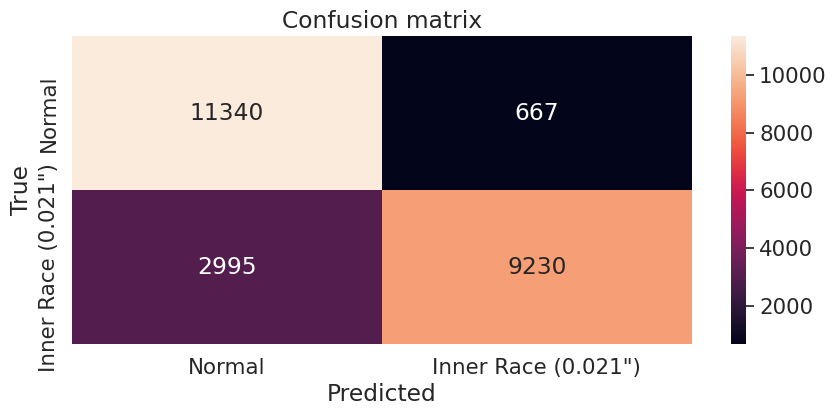

In [21]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.021")']
columns = ['Normal', 'Inner Race (0.021")']
cm_df = pd.DataFrame(cm,columns,index)


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [22]:
classifier.evaluate(X_test, y_test)

758/758 [==============================] - 1s 1ms/step - loss: 0.3453 - accuracy: 0.8489


[0.34532400965690613, 0.848877489566803]

In [25]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Inner Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.79      0.94      0.86     12007
Inner Race (0.021")       0.93      0.76      0.83     12225

           accuracy                           0.85     24232
          macro avg       0.86      0.85      0.85     24232
       weighted avg       0.86      0.85      0.85     24232



In [26]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 3662


To further re-train your model, use
**tf.keras.models.save_model() to save a model**
**tf.keras.models.load_model() to load a model.**

In [27]:
path_to_save_model = '/content/drive/MyDrive/project files/model_name.keras'
tf.keras.models.save_model(classifier, path_to_save_model)